Linear Regression

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype("float32")
y_data = x_data * 0.1 + 0.3 + np.random.randn(len(x_data))*0.01

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
with tf.device('/gpu:0'):
    W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
    b = tf.Variable(tf.zeros([1]))
    y = tf.mul(W, x_data) + b
    # Minimize the mean squared errors.
    loss = tf.reduce_mean(tf.square(y-y_data))
    optimizer = tf.train.GradientDescentOptimizer(0.5)
    train = optimizer.minimize(loss)

# Before starting, initialize the variables. We will 'run' this first
# init = tf.initialize_all_variables()
init = tf.global_variables_initializer ()

# Launch the graph.
sess = tf.Session()
sess.run(init)
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))


0 [ 0.12464377] [ 0.38197017]
20 [ 0.09974997] [ 0.29970267]
40 [ 0.10235503] [ 0.29836023]
60 [ 0.10284578] [ 0.29810733]
80 [ 0.10293824] [ 0.2980597]
100 [ 0.10295565] [ 0.29805073]
120 [ 0.10295893] [ 0.29804903]
140 [ 0.10295957] [ 0.2980487]
160 [ 0.10295963] [ 0.29804868]
180 [ 0.10295963] [ 0.29804868]
200 [ 0.10295963] [ 0.29804868]


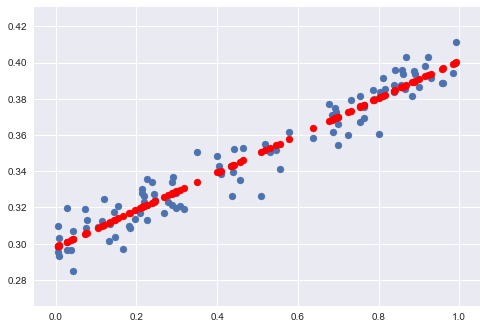

In [2]:
import seaborn as sns
plt.scatter(x_data,y_data)
plt.scatter(x_data,sess.run(W)*x_data+sess.run(b),c='r')
plt.title
plt.show()

Logistic Regression

In [14]:
import tensorflow as tf
import numpy as np
import sys,time
X_data = np.linspace(-100, 100, 1000)
X_test = np.linspace(-20, 80, 10)
y_data = np.zeros([X_data.shape[0],4])
y_test = np.zeros([X_test.shape[0],4])
print(X_data.shape, y_data.shape)
print(X_test.shape, y_test.shape)
ind = 0
for x in X_data:
#     if x<0:
#         y_data[ind,0]=1
#     else:
#         y_data[ind,1]=1    
    if x < -50:
        y_data[ind,0]=1
    if x >= -50 and x < 0:
        y_data[ind,1]=1
    if x >= 0  and x < 50:
        y_data[ind,2]=1
    if x >= 50:
        y_data[ind,3]=1
    ind += 1

ind = 0
for x in X_test:
#     if x<0:
#         y_test[ind,0]=1
#     else:
#         y_test[ind,1]=1    
    if x < -50:
        y_test[ind,0]=1
    if x >= -50 and x < 0:
        y_test[ind,1]=1
    if x >= 0  and x < 50:
        y_test[ind,2]=1
    if x >= 50:
        y_test[ind,3]=1
    ind += 1

batch = 100

with tf.device('/gpu:0'):
    X = tf.placeholder("float", [None, 1]) 
    Y = tf.placeholder("float", [None, 4])
    w1 = tf.Variable(tf.random_normal([1, 20], stddev=0.01))
    b1 = tf.Variable(tf.zeros([20, ]))
    fc1 = tf.add(tf.matmul(X, w1),b1)
    act1 = tf.nn.relu(fc1)
    w2 = tf.Variable(tf.random_normal([20, 4], stddev=0.01))
    b2 = tf.Variable(tf.zeros([4, ]))
    py_x = tf.add(tf.matmul(act1, w2),b2)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y)) 
    train_op = tf.train.GradientDescentOptimizer(0.0005).minimize(cost) 
    predict_op = tf.argmax(py_x, 1)

(1000,) (1000, 4)
(10,) (10, 4)


In [18]:
#print(train_op,predict_op,cost)
sess = tf.Session()
#print(sess)
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
for i in range(800):
    sys.stdout.write('\r epoch : %d' % i)
    sys.stdout.flush()
    time.sleep(0.2)
    #train
    for start, end in zip(range(0, len(X_data), batch), range(batch, len(y_data), batch)):
        #print(start,end)
        Xd = np.mat([X_data[start:end]]).T
        yd = y_data[start:end]
        #print(Xd.shape,yd.shape,train_op)
        sess.run(train_op, feed_dict={X: Xd, Y: yd})

print('')
print(i, np.mean(np.argmax(y_test, axis=1) ==sess.run(predict_op, feed_dict={X: np.mat(X_test).T})))

 epoch : 799
799 0.8
